# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [32]:
Cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
Cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [33]:
C_df = Cancer_df.drop('ID', axis=1)
C_df.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

ValueError: invalid literal for int() with base 10: '?'

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [36]:
i = C_df.select_dtypes(exclude=['number']).apply(lambda x: x.str.contains('\?')) 
c = np.sum(i.values)
c

16

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [37]:
C_df = C_df.replace('?', np.nan)
C_df =C_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [38]:
C_df['Bare Nuclei'] = C_df['Bare Nuclei'].astype('int64')

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [39]:
# Check for correlation of variable
C_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Bhanushree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


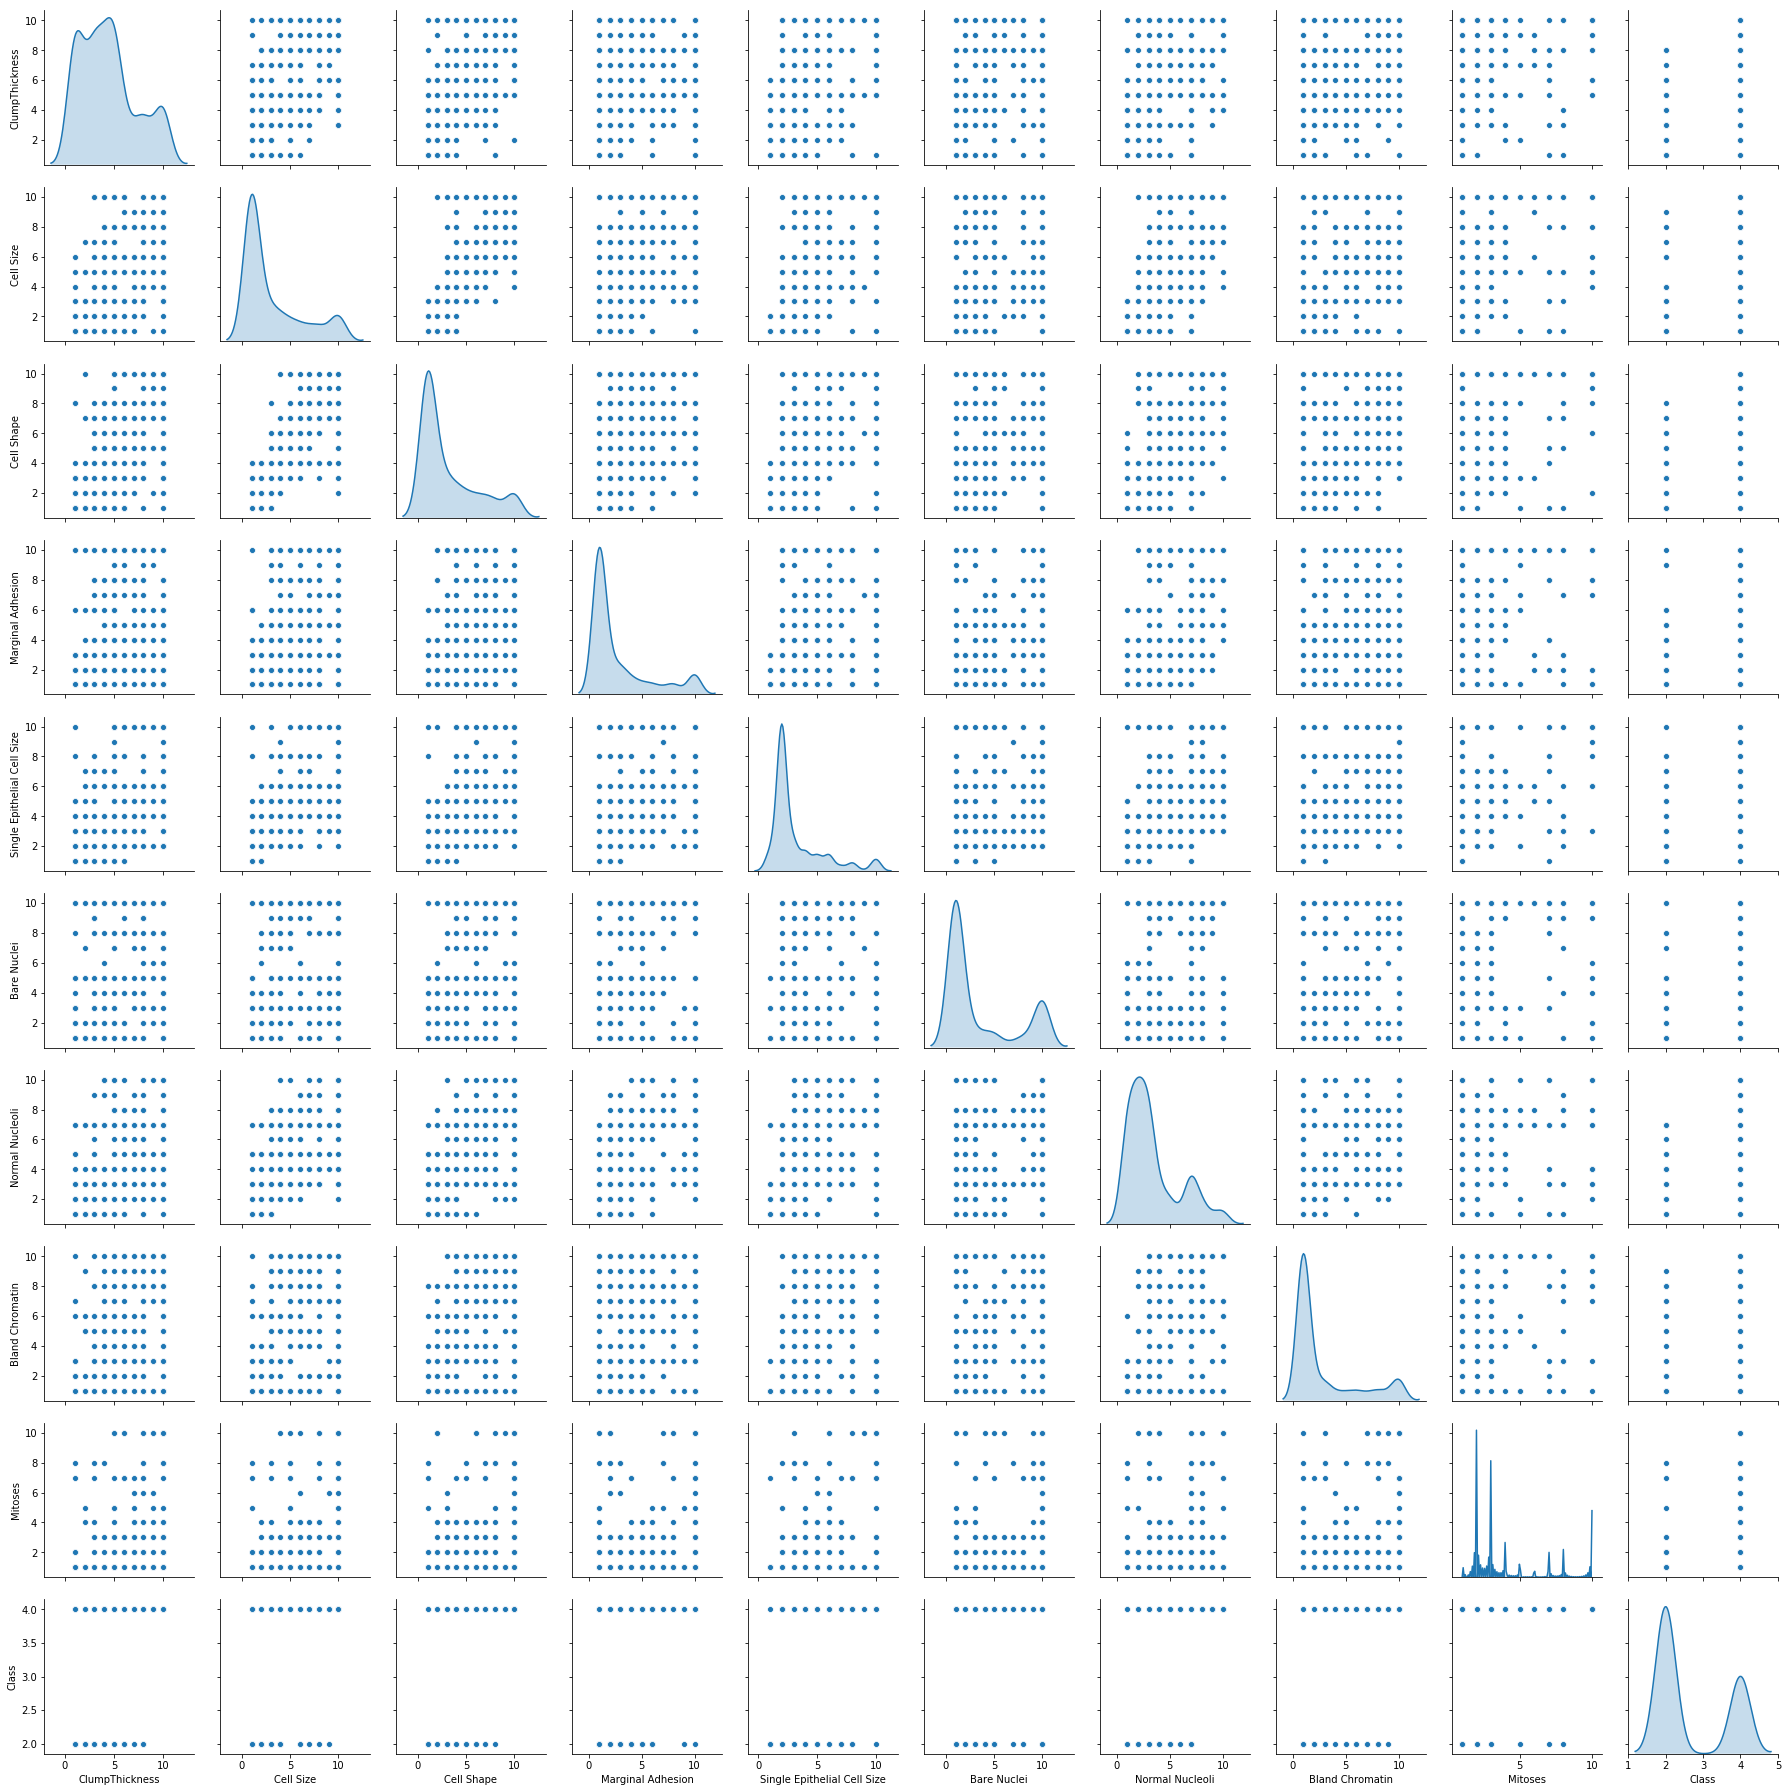

In [40]:
#Let us check for pair plots
sns.pairplot(C_df, diag_kind='kde')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix

In [94]:
X = C_df[C_df.columns[0:-1]]
y = C_df["Class"]

In [95]:
from sklearn.preprocessing import StandardScaler

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test_O, y_train, y_test_O = train_test_split(X, y, test_size=0.30, random_state=1)


print(X_train.shape)
print(X_test_O.shape)
print(y_test_O.shape)

(489, 9)
(210, 9)
(210,)


In [98]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)


Covariance Matrix 
%s [[1.00204918 0.66567241 0.68303668 0.51766685 0.5473968  0.59980405
  0.54902348 0.56063467 0.37977544]
 [0.66567241 1.00204918 0.90744823 0.71135907 0.73096251 0.6755228
  0.75495524 0.71146524 0.44284885]
 [0.68303668 0.90744823 1.00204918 0.69033881 0.70625629 0.70203072
  0.72483929 0.69355343 0.42748444]
 [0.51766685 0.71135907 0.69033881 1.00204918 0.56603551 0.65543481
  0.6429217  0.59196798 0.41411745]
 [0.5473968  0.73096251 0.70625629 0.56603551 1.00204918 0.5831137
  0.5835245  0.60364187 0.46836455]
 [0.59980405 0.6755228  0.70203072 0.65543481 0.5831137  1.00204918
  0.67766204 0.56928108 0.36578076]
 [0.54902348 0.75495524 0.72483929 0.6429217  0.5835245  0.67766204
  1.00204918 0.6559854  0.26985257]
 [0.56063467 0.71146524 0.69355343 0.59196798 0.60364187 0.56928108
  0.6559854  1.00204918 0.38596877]
 [0.37977544 0.44284885 0.42748444 0.41411745 0.46836455 0.36578076
  0.26985257 0.38596877 1.00204918]]


C:\Users\Bhanushree\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhanushree\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q7 Identify eigen values and eigen vector

In [100]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 3.15255741e-01 -6.83776570e-05 -1.38822160e-02 -8.14996512e-01
  -2.93729981e-01  2.97746762e-01  1.61798289e-01 -9.87225080e-02
  -1.59205928e-01]
 [ 3.82453923e-01 -6.48095038e-02 -7.40420491e-01 -1.68901685e-02
   1.70935217e-01 -3.08521159e-01 -9.87410125e-02  3.04007455e-01
  -2.72848804e-01]
 [ 3.78893165e-01 -7.78433513e-02  6.54491857e-01 -9.16107964e-02
   8.94066819e-02 -5.07990793e-01 -1.14241374e-01  2.76864237e-01
  -2.40572557e-01]
 [ 3.33010171e-01 -3.86941154e-02  4.56740826e-02  5.06767239e-01
  -3.51964855e-01  2.18316662e-01  9.13215983e-02 -3.50886626e-01
  -5.70706013e-01]
 [ 3.31981528e-01  1.67350863e-01  5.22048765e-02 -3.69947563e-02
   4.52595818e-01  2.90948294e-01 -6.62414664e-01 -3.47373529e-01
   9.34481299e-02]
 [ 3.35870185e-01 -1.46539042e-01 -9.47604497e-02  8.34925578e-02
  -5.47723456e-01 -3.23927190e-01 -1.93370660e-01 -2.28619034e-01
   5.95968367e-01]
 [ 3.40626376e-01 -3.49791616e-01  9.52247454e-02  2.14468913e-01
   3.22220

In [101]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(5.84745351116986, array([0.31525574, 0.38245392, 0.37889316, 0.33301017, 0.33198153,
       0.33587019, 0.34062638, 0.33236366, 0.22444279])), (0.8095351210352966, array([-6.83776570e-05, -6.48095038e-02, -7.78433513e-02, -3.86941154e-02,
        1.67350863e-01, -1.46539042e-01, -3.49791616e-01, -6.69208369e-02,
        9.01071766e-01])), (0.50560174169249, array([-0.81499651, -0.01689017, -0.0916108 ,  0.50676724, -0.03699476,
        0.08349256,  0.21446891,  0.04134862,  0.11934652])), (0.4768562036765785, array([-0.29372998,  0.17093522,  0.08940668, -0.35196486,  0.45259582,
       -0.54772346,  0.032222  ,  0.48204007, -0.11994247])), (0.40112078954797337, array([ 0.16179829, -0.09874101, -0.11424137,  0.0913216 , -0.66241466,
       -0.19337066,  0.08695884,  0.65799608,  0.16116676])), (0.3407165152336644, array([-0.15920593, -0.2728488 , -0.24057256, -0.57070601,  0.09344813,
        0.59596837,  0.28009318,  0.23338062,  0.14070162])), (0.30236122856269143, array([-0.098722

# Q8 Find variance and cumulative variance by each eigen vector

In [102]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 9 th entry 
# cumulative reaching almost 100%

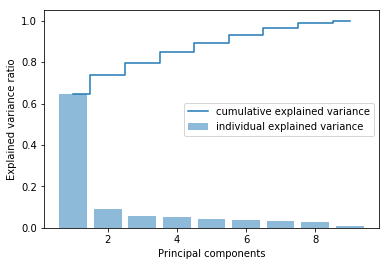

In [104]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [60]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(5.31287956913731, array([0.40186727, 0.39658605, 0.35405406, 0.35082091, 0.35191495,
       0.36080977, 0.35043296, 0.2365619 ])), (0.809535119316374, array([ 0.06481664,  0.07784726,  0.03871061, -0.16734093,  0.14654319,
        0.34980432,  0.06693004, -0.90106576])), (0.480267640208863, array([ 0.17083266,  0.12450991, -0.52086471,  0.44672378, -0.52709385,
       -0.04729698,  0.4247523 , -0.15482846])), (0.40498635665902716, array([ 0.08743848,  0.13577096, -0.20087572,  0.59484624,  0.26855412,
       -0.12301762, -0.68420881, -0.15598498])), (0.34669486346389583, array([-0.22755559, -0.15567775, -0.65656542, -0.06969848,  0.59974431,
        0.22400647,  0.23161173,  0.15662291])), (0.305291425511465, array([ 0.36342444,  0.3764255 , -0.33557132, -0.44136444, -0.24409134,
        0.40760696, -0.38247409,  0.21634554])), (0.2679959440294935, array([ 0.24536782,  0.463134  , -0.12485365, -0.30512453,  0.27522908,
       -0.71025752,  0.15555089, -0.11045018])), (0.0887425242965

In [109]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=6, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [110]:
pca1 = pca.fit_transform(X_train)

In [111]:
pca1_df = pd.DataFrame(data=pca1, columns = [0,1,2,3,4,5])

# Q10 Find correlation between components and features

In [112]:
Proj_data_df.corr()

,0,1,2,3,4,5
0,1.000000e+00,1.043249e-15,4.523036e-16,1.876682e-17,1.650317e-16,8.574511e-17
1,1.043249e-15,1.000000e+00,-2.918911e-18,-1.319139e-16,1.288309e-17,3.981388e-16
2,4.523036e-16,-2.918911e-18,1.000000e+00,-1.505655e-16,3.722268e-16,-1.714847e-15
3,1.876682e-17,-1.319139e-16,-1.505655e-16,1.000000e+00,1.454885e-15,9.349336e-16
4,1.650317e-16,1.288309e-17,3.722268e-16,1.454885e-15,1.000000e+00,1.868512e-15
5,8.574511e-17,3.981388e-16,-1.714847e-15,9.349336e-16,1.868512e-15,1.000000e+00


C:\Users\Bhanushree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


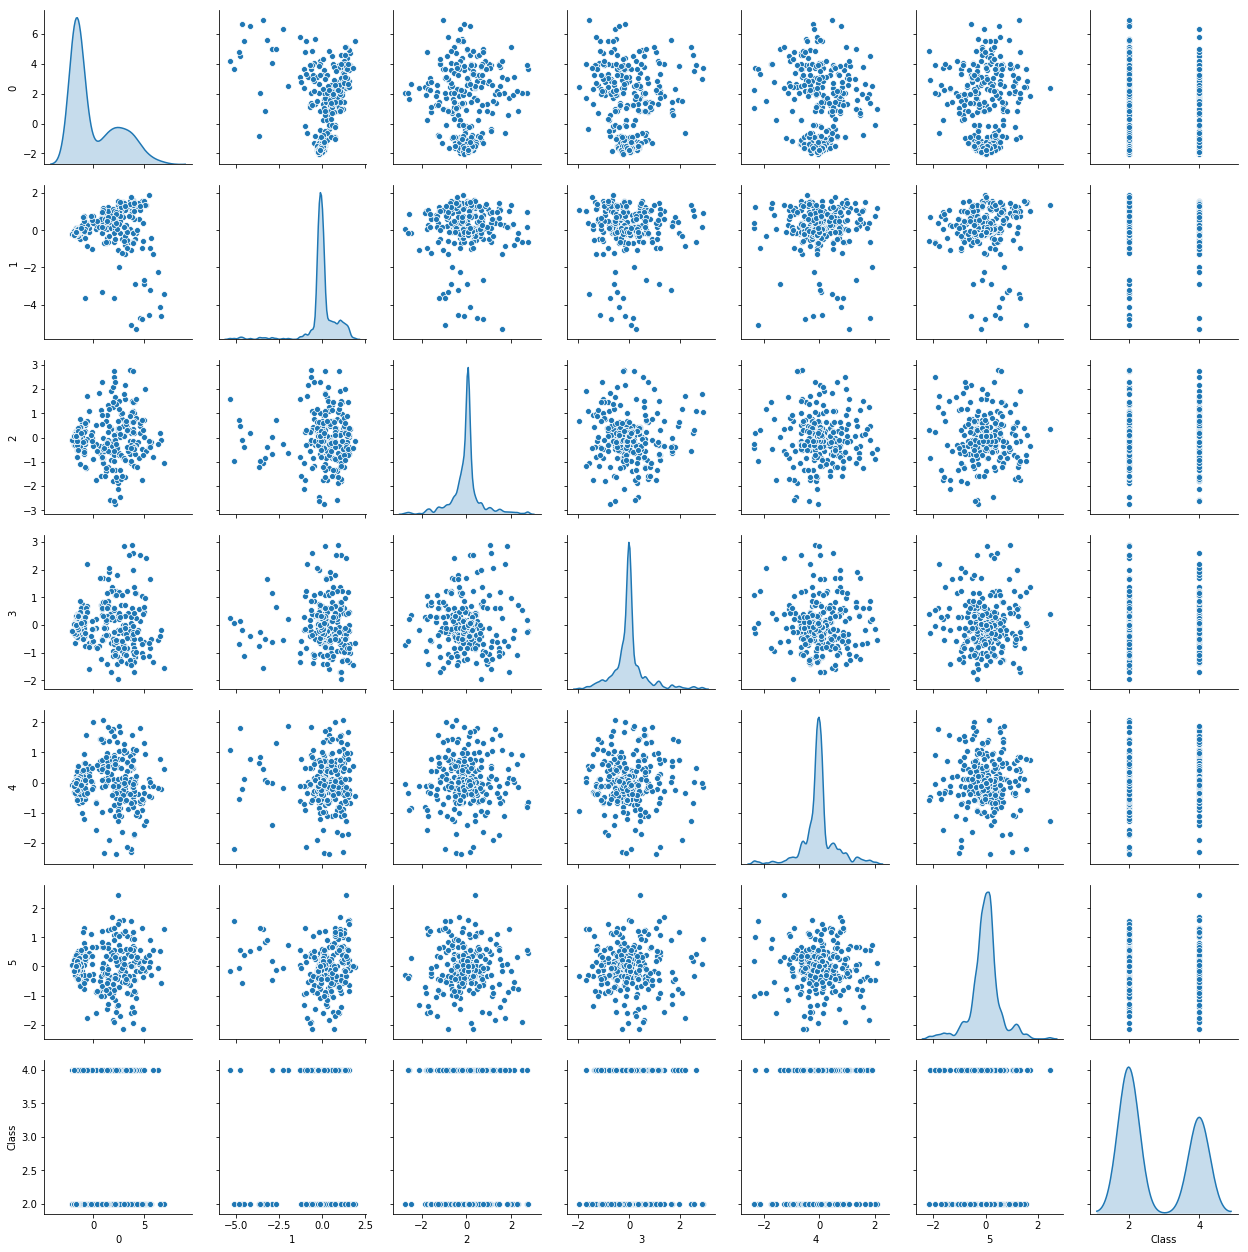

In [113]:
Proj_data_C_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_C_df, diag_kind='kde')

In [ ]:
# As seen above the data seems to be in a cirucal fashion compared to the plot observed in the begining.
# So PCA has helped in projecting the data. 

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [114]:
df = pd.read_csv("jokes.csv")

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [116]:
ratings = df.head(200)
ratings = ratings.drop('NumJokes', axis=1)
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [117]:
ratings.columns=list(range(0,100))
ratings.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [118]:
ratings= ratings.replace(99,0)
ratings_diff = sc.fit_transform(ratings)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [119]:
ratings_diff = pd.DataFrame(ratings_diff)
ratings_diff.mean()

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
          ...     
70    7.632783e-19
71   -9.325873e-17
72   -4.024558e-17
73    7.743806e-17
74    1.290634e-17
75    3.885781e-17
76    3.747003e-18
77   -2.886580e-17
78   -9.853229e-18
79   -6.938894e-17
80    3.941292e-17
81    1.243450e-16
82    0.000000e+00
83    2.498002e-17
84   -2.045586e-16
85   -1.290634e-17
86   -8.465451e-17
87    5.107026e-17
88    2.997602e-17
89   -6.369905e-17
90   -4.385381e-17
91   -3.4972

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [120]:
ratings_diff1 = pd.DataFrame(ratings_diff.mean())
ratings_diff1

,0
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18
5,-2.636780e-18
6,-1.665335e-18
7,2.331468e-17
8,-4.329870e-17
9,-2.553513e-17


In [122]:
m=ratings_diff1.sort_values(by = 0, ascending=False)[0:10]
m

,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17


In [ ]:
#the above are the Top 10 Joke ID's